In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [66]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [68]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [69]:
replacement_dict = {'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}
df.rename(columns = replacement_dict, inplace = True)
df['Annual Income'] *= 1000
df.head()

,CustomerID,Genre,Age,Annual Income,Spending Score
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


# Feature Engineering 

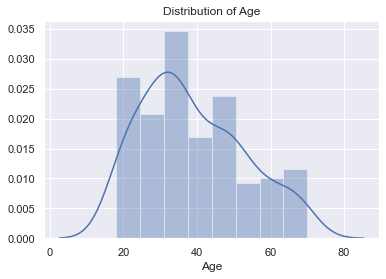

In [70]:
sns.distplot(df['Age'])
plt.title('Distribution of Age')
plt.show()

In [71]:
min(df['Age']), max(df['Age'])

(18, 70)

In [72]:
df['Age Category'] = df['Age']
for i in range(len(df)):
    if 18 <= df['Age'][i] <= 30:
        df['Age Category'][i] = '18-30'
    elif 30 <= df['Age'][i] <= 40:
        df['Age Category'][i] = '30-40'
    elif 40 <= df['Age'][i] <= 50:
        df['Age Category'][i] = '40-50'
    elif 50 <= df['Age'][i] <= 60:
        df['Age Category'][i] = '50-60'
    elif 60 <= df['Age'][i] <= 70:
        df['Age Category'][i] = '60-70'

<ipython-input-72-cb4485a7f97d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Category'][i] = '18-30'
C:\Users\acer\Downloads\folder to download\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-72-cb4485a7f97d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Category'][i] = '30-40'
<ipython-input-72-cb4485a7f97d>:12

In [73]:
df.head()

,CustomerID,Genre,Age,Annual Income,Spending Score,Age Category
0,1,Male,19,15000,39,18-30
1,2,Male,21,15000,81,18-30
2,3,Female,20,16000,6,18-30
3,4,Female,23,16000,77,18-30
4,5,Female,31,17000,40,30-40


# Data Visualization

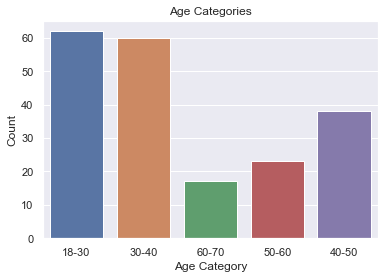

In [74]:
sns.countplot(df['Age Category'])
plt.title('Age Categories')
plt.ylabel('Count')
plt.show()

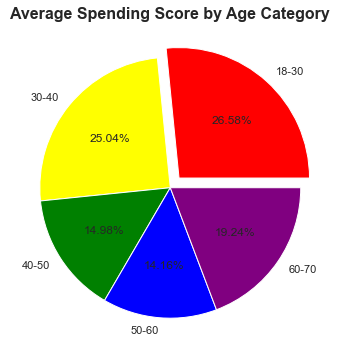

In [115]:
age_categories = list(df['Age Category'].value_counts().index)
colors = ['red', 'yellow', 'green', 'blue', 'purple']
explodes = [0.1, 0, 0, 0, 0]
sizes = []
for category in age_categories:
    avg_spending_score = np.mean(df.loc[df['Age Category'] == category, 'Spending Score'])
    sizes.append(avg_spending_score)

plt.figure(figsize = (8, 6))
plt.pie(sizes, labels = age_categories, colors = colors, autopct = '%.2f%%', explode = explodes)
plt.title('Average Spending Score by Age Category', fontsize = 16, fontweight = 'bold')
plt.show()

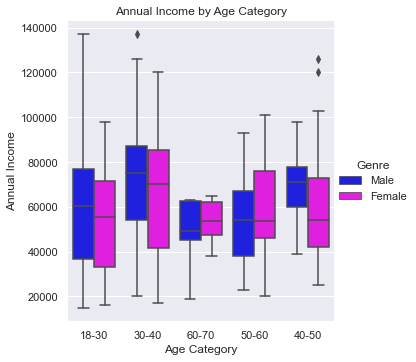

In [75]:
sns.catplot(x = 'Age Category', y = 'Annual Income', data = df, hue = 'Genre', kind = 'box',
            palette = ['blue', 'magenta'])
plt.title('Annual Income by Age Category')
plt.show()

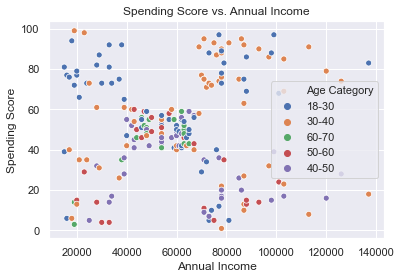

In [76]:
sns.scatterplot(x = df['Annual Income'], y = df['Spending Score'], hue = df['Age Category'])
plt.title('Spending Score vs. Annual Income')
plt.show()

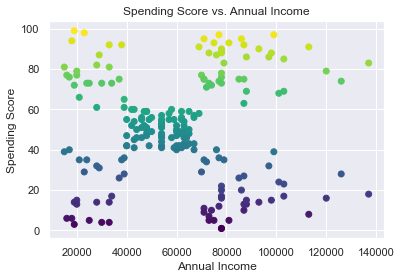

In [77]:
plt.scatter(x = df['Annual Income'], y = df['Spending Score'], 
            c = df['Spending Score'], cmap = 'viridis')
plt.title('Spending Score vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

View the relationship between annual income and spending score in more detail.

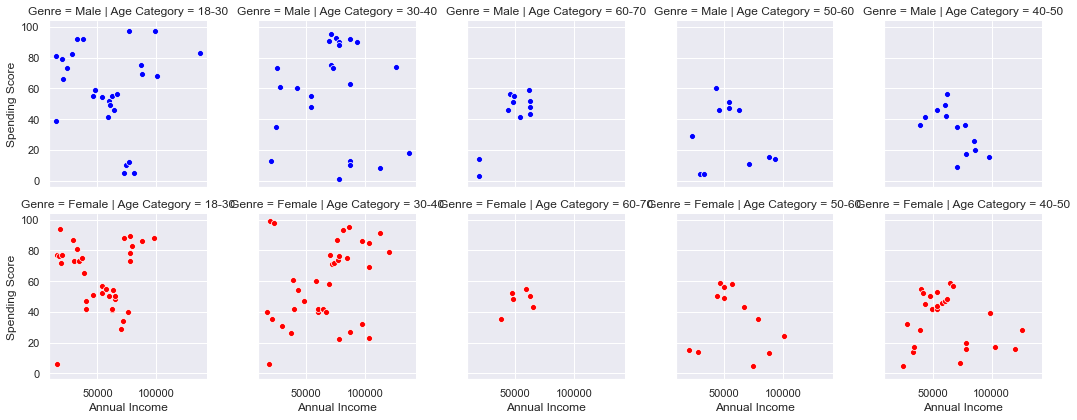

In [78]:
grid = sns.FacetGrid(df, col = 'Age Category', row = 'Genre', hue = 'Genre', palette = ['blue', 'red'])
grid.map(sns.scatterplot, 'Annual Income', 'Spending Score')
plt.show()

# Feature Engineering

In [79]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income', 'Spending Score',
       'Age Category'],
      dtype='object')

In [80]:
df['Genre']

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Genre, Length: 200, dtype: object

In [81]:
df.loc[df['Genre'] == 'Female', 'Genre'] = 0
df.loc[df['Genre'] == 'Male', 'Genre'] = 1
df.head()

,CustomerID,Genre,Age,Annual Income,Spending Score,Age Category
0,1,1,19,15000,39,18-30
1,2,1,21,15000,81,18-30
2,3,0,20,16000,6,18-30
3,4,0,23,16000,77,18-30
4,5,0,31,17000,40,30-40


In [82]:
features = ['CustomerID', 'Genre', 'Age', 'Annual Income']

# Make Train and Test Data

In [83]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['Spending Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [84]:
X_train

,CustomerID,Genre,Age,Annual Income
169,170,1,32,87000
97,98,0,27,60000
31,32,0,21,30000
12,13,0,58,20000
35,36,0,21,33000
...,...,...,...,...
106,107,0,66,63000
14,15,1,37,20000
92,93,1,48,60000
179,180,1,35,93000


In [85]:
y_train

169    63
97     50
31     73
12     15
35     81
       ..
106    50
14     13
92     49
179    90
102    59
Name: Spending Score, Length: 140, dtype: int64

In [86]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((140, 4), (140,), (60, 4), (60,))

# Modelling

In [87]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([58.46426944, 58.44694904, 37.67184103, 59.10096105, 42.51418866,
       63.31134158, 53.58844334, 54.97214912, 49.1395136 , 56.35967701,
       47.18491463, 50.09286472, 56.89312081, 57.89202775, 45.61902078,
       62.85914372, 42.45715623, 52.68801855, 35.42787049, 60.17621121,
       61.13505406, 51.48394494, 57.15710859, 49.69150097, 60.10047465,
       32.42542682, 60.15276492, 34.20303182, 57.11754348, 60.93808975,
       53.46387481, 42.10481251, 44.67431622, 55.64070436, 52.74697674,
       46.34005436, 59.05664203, 57.81040626, 49.24335632, 45.88904042,
       44.38282894, 49.98393713, 49.37523466, 40.44642722, 52.14388302,
       50.31769424, 57.42307501, 51.33652504, 57.95712547, 41.50034681,
       63.63764007, 57.68446575, 57.6288053 , 50.54920983, 47.89389624,
       38.8771926 , 44.54640881, 46.03650146, 57.48344822, 46.60334145])

In [88]:
predictions.shape

(60,)

In [89]:
np.array(y_test)

array([52, 79,  4,  1, 11, 50, 47, 13, 13, 65, 50, 15, 75, 52, 24, 69, 50,
       20, 41, 59, 29, 35, 22, 40, 59, 56, 57, 48, 77, 34, 72, 29, 41, 54,
       17, 56, 88, 73, 26, 53, 42, 74, 26, 14, 58, 79, 87, 98, 87, 58, 48,
       92, 76, 35, 59, 56,  5, 42, 10, 47], dtype=int64)

# Model Evaluation

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [91]:
mae = mean_absolute_error(predictions, y_test)
mae

19.474541901925853

In [92]:
mse = mean_squared_error(predictions, y_test)
mse

562.9247434738082

In [93]:
rmse = mean_squared_error(predictions, y_test, squared = False)
rmse

23.726035140195847

# Actual Data vs. Predictions

In [94]:
comparison = pd.DataFrame({'Actual Data': y_test, 'Predictions': predictions})
comparison.head()

,Actual Data,Predictions
95,52,58.464269
15,79,58.446949
30,4,37.671841
158,1,59.100961
128,11,42.514189


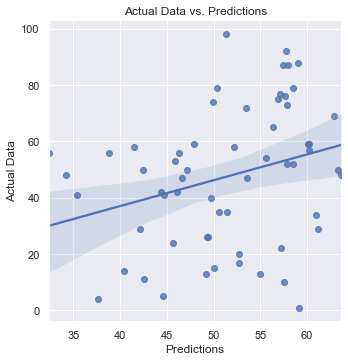

In [95]:
sns.lmplot(x = 'Predictions', y = 'Actual Data', data = comparison)
plt.title('Actual Data vs. Predictions')
plt.show()